In [106]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as pt


In [107]:
td = pd.read_csv("Titanic-Dataset.csv")

In [108]:
td.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
td = td.drop(columns = 'Cabin', axis=1)

In [111]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [112]:
td['Age'].fillna(td['Age'].mean(),inplace=True)

In [113]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [114]:
print(td['Embarked'].mode())

0    S
dtype: object


In [115]:
td['Embarked'].fillna(td['Embarked'].mode()[0], inplace=True) 

In [116]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [117]:
td.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0, 'C':1,'Q':2}}, inplace=True) 

In [118]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [119]:
td=td.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [120]:
td.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [121]:
feature_cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'] 

In [122]:
X=td[feature_cols]
Y=td['Survived'] 

In [123]:
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [124]:
model=DecisionTreeClassifier()

In [125]:
model=model.fit(X_train,Y_train)

In [126]:
X_train_pred=model.predict(X_train)

In [127]:
train_acc = accuracy_score(Y_train,X_train_pred)
print('accuracy of training values:', train_acc)

accuracy of training values: 0.9803370786516854


In [128]:
X_test_pred=model.predict(X_test)

In [129]:
test_acc = accuracy_score(Y_test,X_test_pred)
print('accuracy of test values:', test_acc)

accuracy of test values: 0.7877094972067039


[Text(177.57487958176694, 212.49818181818182, 'X[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(71.01028547932331, 202.61454545454546, 'X[2] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(18.879699248120303, 192.73090909090908, 'X[3] <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(16.362406015037596, 182.84727272727272, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(21.396992481203007, 182.84727272727272, 'X[2] <= 2.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(18.879699248120303, 172.96363636363637, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(23.914285714285715, 172.96363636363637, 'X[5] <= 31.331\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(21.396992481203007, 163.07999999999998, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(26.431578947368422, 163.07999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(123.14087171052633, 192.73090909090908, 'X[0] <= 1.5\ngini = 0.271\nsamples = 445\nvalue = [

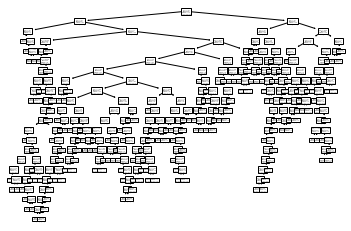

In [130]:
tree.plot_tree(model)

In [131]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('titanic')

'titanic.pdf'